In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings
warnings.simplefilter("ignore")

# Data Load

In [3]:
df = pd.read_excel(r"C:\Users\Dell\Desktop\Python\Python 7 to 8\project Data new.xlsx")

# EDA

In [4]:
df.shape

(11251, 15)

In [5]:
df.head(5)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [7]:
df.isnull().sum()

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64

In [8]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'Status', 'unnamed1'],
      dtype='object')

In [9]:
df["Zone"].unique()

array(['Western', 'Southern', 'Central', 'Northern', 'Eastern'],
      dtype=object)

In [10]:
df["Age Group"].unique()

array(['26-35', '0-17', '18-25', '55+', '46-50', '51-55', '36-45'],
      dtype=object)

In [11]:
df["Marital_Status"].unique()

array([0, 1], dtype=int64)

# DC

In [12]:
df.drop(['Status', 'unnamed1'],axis=1,inplace=True)

In [13]:
df.dropna(inplace=True)

In [14]:
df.rename(columns={'Occupation':"Sector"},inplace=True)

In [15]:
df["Marital_Status"] = df["Marital_Status"].astype(str).str.replace("0","Single")

In [16]:
df["Marital_Status"] = df["Marital_Status"].astype(str).str.replace("1","Married")

In [17]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Sector,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,Single,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,Married,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,Married,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,Single,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,Married,Gujarat,Western,Food Processing,Auto,2,23877.0


# DV

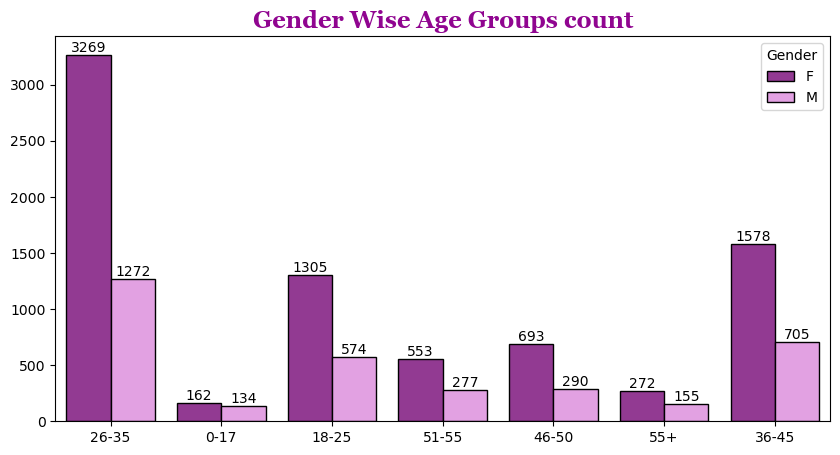

In [33]:
plt.figure(figsize=(10,5))

C1 = ["#A12BA1", "#ED96ED"]

Chart_1 = sns.countplot(x="Age Group",data=df,hue="Gender",palette=C1,edgecolor="Black")

for i in Chart_1.containers:
    Chart_1.bar_label(i)

plt.title("Gender Wise Age Groups count",fontsize=17,color="#900590",fontweight="bold",family="georgia")

plt.xlabel("")

plt.ylabel("")

plt.show()

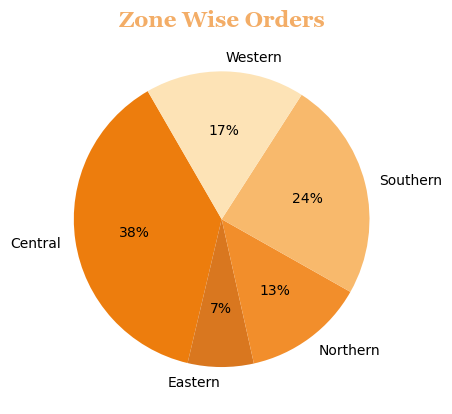

In [38]:
D1 = df.groupby("Zone",as_index=False)["Orders"].sum()


C2 = [ "#ED7D0D", "#D9771F", "#F28E2B", "#F8B96C", "#FDE3B6" ]


plt.pie(D1["Orders"],labels=D1["Zone"],autopct="%.f%%",colors=C2,startangle=120)

plt.title("Zone Wise Orders",fontweight="bold",fontsize=16,family="georgia",color="#F3AD67")

plt.show()

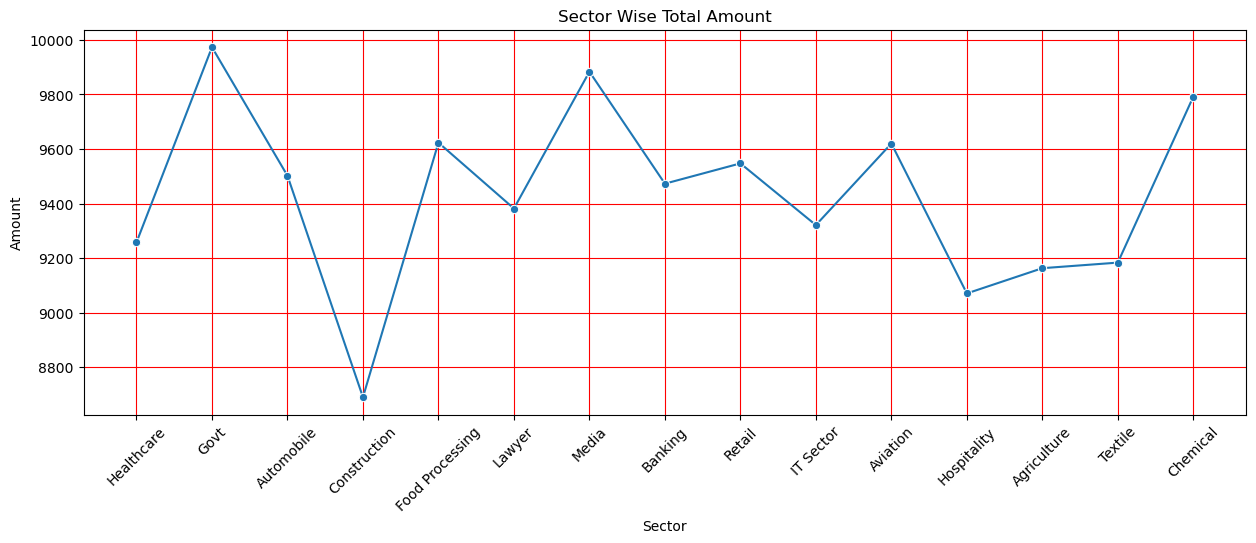

In [39]:
plt.figure(figsize=(15,5))

sns.lineplot(x="Sector",y="Amount",data=df,ci=None,marker="o")

plt.title("Sector Wise Total Amount")

plt.xticks(rotation=45)

plt.grid(color="r")

plt.show()

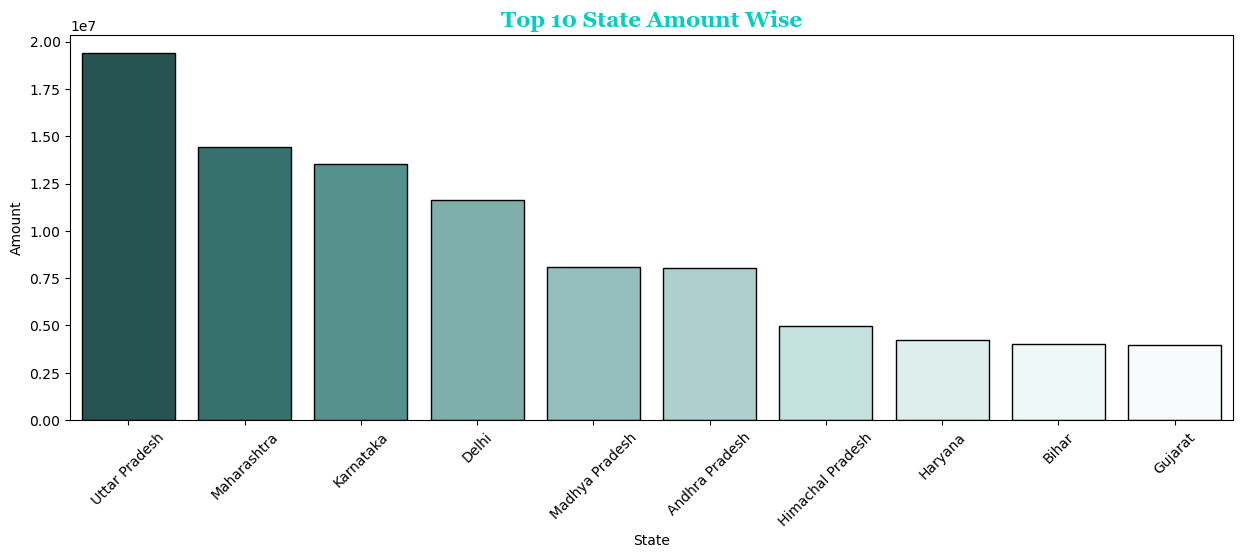

In [42]:
D2 = df.groupby("State",as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False).head(10)

c3 = [
    "#1F5C59", "#2E7A76", "#4B9C97", "#76B7B2", "#8EC6C2",
    "#A7D6D3", "#C1E5E3", "#DAF1F0", "#EDF9F8", "#F6FCFC"
]

plt.figure(figsize=(15,5))

sns.barplot(x="State",y="Amount",data=D2,palette=c3,edgecolor="black")

plt.title("Top 10 State Amount Wise",fontsize=16,color="#00CFC1",fontweight="bold",family="georgia")

plt.xticks(rotation=45)

plt.show()

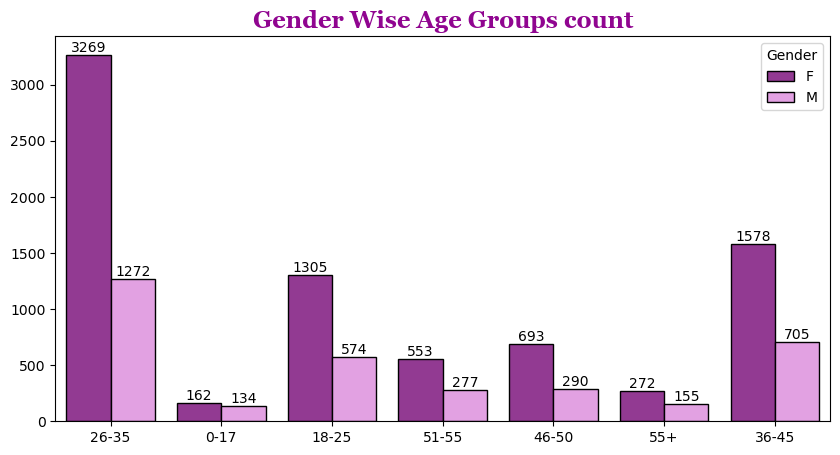

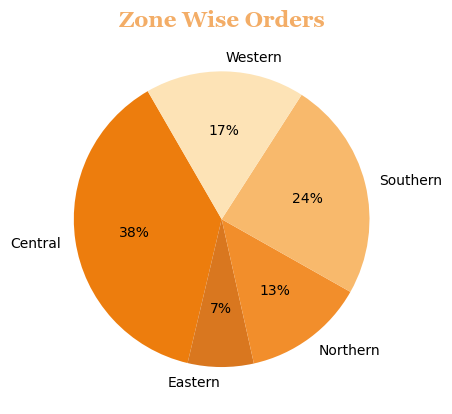

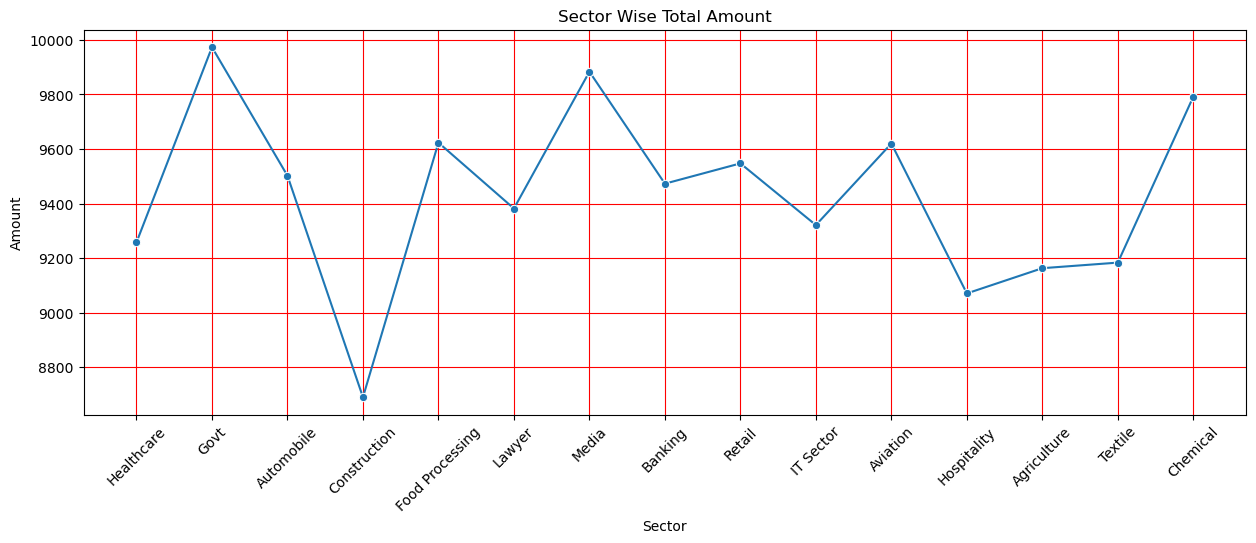

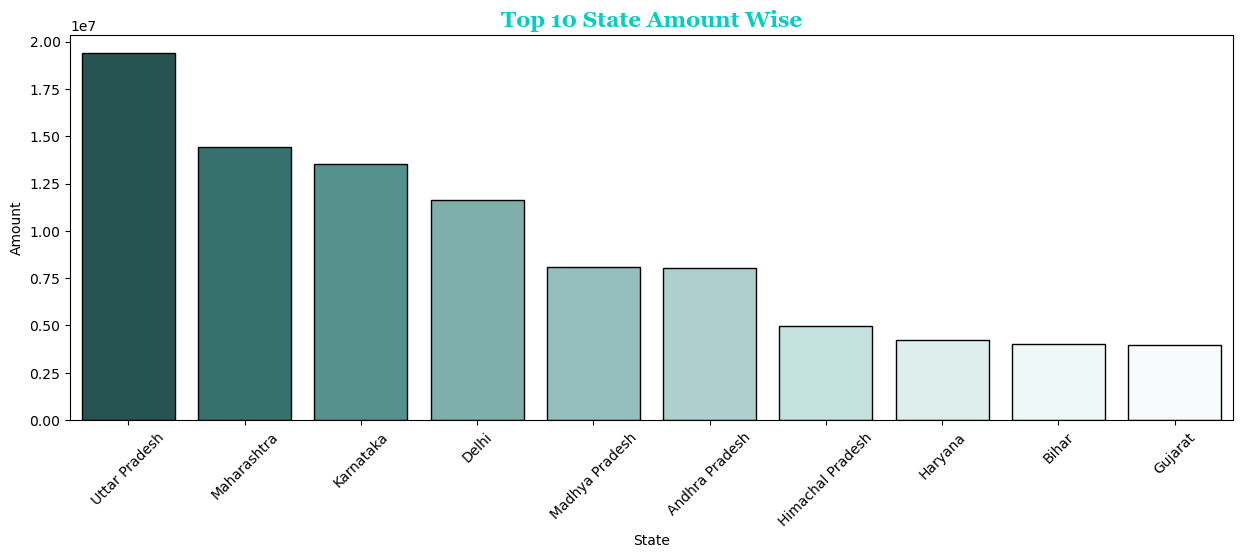

In [43]:
# chart - 1 
plt.figure(figsize=(10,5))

C1 = ["#A12BA1", "#ED96ED"]

Chart_1 = sns.countplot(x="Age Group",data=df,hue="Gender",palette=C1,edgecolor="Black")

for i in Chart_1.containers:
    Chart_1.bar_label(i)

plt.title("Gender Wise Age Groups count",fontsize=17,color="#900590",fontweight="bold",family="georgia")

plt.xlabel("")

plt.ylabel("")

plt.show()

# chart - 2 

D1 = df.groupby("Zone",as_index=False)["Orders"].sum()


C2 = [ "#ED7D0D", "#D9771F", "#F28E2B", "#F8B96C", "#FDE3B6" ]


plt.pie(D1["Orders"],labels=D1["Zone"],autopct="%.f%%",colors=C2,startangle=120)

plt.title("Zone Wise Orders",fontweight="bold",fontsize=16,family="georgia",color="#F3AD67")

plt.show()

# chart - 3

plt.figure(figsize=(15,5))

sns.lineplot(x="Sector",y="Amount",data=df,ci=None,marker="o")

plt.title("Sector Wise Total Amount")

plt.xticks(rotation=45)

plt.grid(color="r")

plt.show() 


# chart - 4 

D2 = df.groupby("State",as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False).head(10)

c3 = [
    "#1F5C59", "#2E7A76", "#4B9C97", "#76B7B2", "#8EC6C2",
    "#A7D6D3", "#C1E5E3", "#DAF1F0", "#EDF9F8", "#F6FCFC"
]

plt.figure(figsize=(15,5))

sns.barplot(x="State",y="Amount",data=D2,palette=c3,edgecolor="black")

plt.title("Top 10 State Amount Wise",fontsize=16,color="#00CFC1",fontweight="bold",family="georgia")

plt.xticks(rotation=45)

plt.show()